### ECE 657A: Data and Knowledge Modeling and Analysis
#### Assignment 1: Data Cleaning and Dimensionality Reduction
####    



**Submitted By Group 21:**<br>

**Ankush Malhotra - 20709477**<br>

**Shreesha Pillangere Ramachandra – 20740615**<br>

**Gunasekaran Marati Saravanan - 20715573**<br>

In [28]:
#Importing libraries :
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats

In [29]:
#Importing Data:
DataA_df = pd.read_csv('DataA.csv')

In [30]:
DataA_df.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [31]:
#Removing "Unnamed: 0" column from the dataframe:
DataA_df.drop('Unnamed: 0',axis=1, inplace=True)

## I. Data Cleaning and Preprocessing (for dataset A)
### 1. Detect any problems that need to be fixed in dataset A. Report such problems.

In [32]:
DataA_df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [33]:
DataA_df.shape

(19000, 81)

In [34]:
#Getting index of rows where all the column values are NA:
df_na = DataA_df.any(skipna=True,axis=1)
df_na[df_na==False].shape[0]

773

## Answer I.1
**Missing values:**<br>

**i. Entire row containing missing values or NaN’s : from Index 18,227 to 19,000 (773 rows)**<br>
    
**ii. Missing some of the values in different features/columns**<br>
    
**Outlier also present in some of the features.**

### 2. Fix the detected problems using some of the methods discussed in class.

In [35]:
#Selecting subset of data to remove NA's:
DataA_df = DataA_df.iloc[:18227,:]

In [36]:
DataA_df.shape

(18227, 81)

In [37]:
#Imputing mean for the missing values:
DataA_df = DataA_df.fillna(value=DataA_df.mean())

In [38]:
DataA_df.isna().any().any()

False

In [39]:
DataA_df.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,...,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,...,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,280.937065,371.370878,392.123815,183.015924,193.819578,253.812810,316.277302,196.136875,326.750917,341.394953,...,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,...,-953.000000,-853.000000,-771.000000,-984.000000,-2562.000000,-5424.000000,-3133.000000,-7189.000000,-5861.000000,-3051.000000
25%,-176.000000,362.000000,311.000000,-408.500000,861.000000,-144.000000,-129.500000,855.000000,-153.000000,161.000000,...,-487.000000,-323.000000,-173.000000,29.000000,-983.000000,-276.000000,31.000000,-246.500000,-118.000000,-115.000000
50%,-104.000000,795.000000,590.000000,-266.000000,969.000000,-39.000000,67.000000,945.000000,45.000000,376.000000,...,-223.000000,32.000000,251.000000,698.000000,-940.000000,0.000000,132.000000,-29.000000,4.000000,19.000000
75%,-17.000000,982.000000,952.000000,-167.000000,1006.000000,45.000000,249.000000,996.000000,314.000000,580.000000,...,174.000000,179.000000,413.000000,823.000000,-840.000000,225.000000,276.000000,195.000000,115.000000,169.000000
max,1887.000000,2531.000000,2941.000000,609.000000,1833.000000,1215.000000,1490.000000,1682.000000,1096.000000,2202.000000,...,949.000000,775.000000,759.000000,999.000000,613.000000,4877.000000,3742.000000,7497.000000,8675.000000,5821.000000


In [40]:
#Function to remove outliers based on IQR:
def remove_out(df_in):
    for col_name in (DataA_df.columns):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    
    return df_out

In [41]:
DataA_df_out = remove_out(DataA_df)
DataA_df_out.shape

(15611, 81)

## Answer I.2
**For each of the problem described in question 1.1, we followed below fixes:**<br>

**i. Filtered the original dataset to remove the entire row containing missing values. (i.e. selecting data up to row number 18227)**<br>

**ii. On this filtered dataset missing values were imputed with the mean of that feature/column.**<br><br>
**Outliers were removed by using the interquartile range method.**

### 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


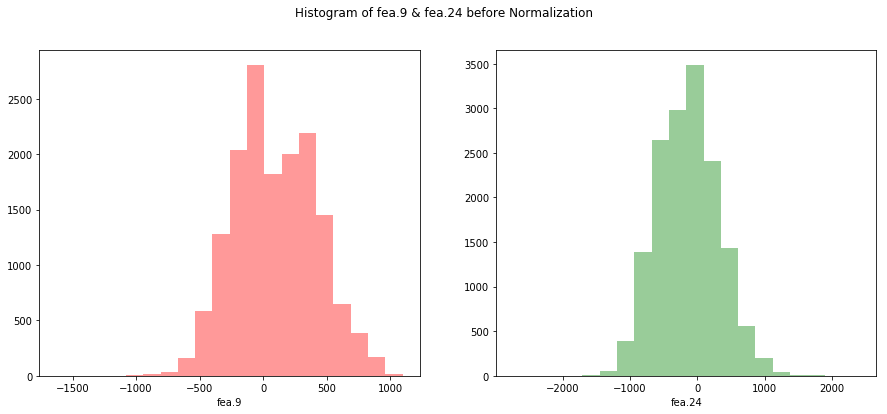

In [42]:
#Plots before normalizing the data:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.distplot(DataA_df_out['fea.9'],kde=False,bins=20,ax=ax[0],color='red')
# Set title
plt.suptitle("Histogram of fea.9 & fea.24 before Normalization")
sns.distplot(DataA_df_out['fea.24'],kde=False,bins=20,ax=ax[1],color='green')
fig.show()

### Min-max Normalization

In [43]:
#Plots after normalizing the data (Min-max):
#Importing required library:
from sklearn.preprocessing import MinMaxScaler
#Instantiating the function
minmax = MinMaxScaler()
minmax.fit(DataA_df)
#Transforming the data
minmax_tranf = minmax.transform(DataA_df_out)
#Preparing dataframe
DataA_df_minmax_norm = pd.DataFrame(minmax_tranf, index=DataA_df_out.index, columns=DataA_df_out.columns)
DataA_df_minmax_norm.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,0.557580,0.374778,0.610278,0.609929,0.602502,0.477283,0.446254,0.599126,0.719485,0.443916,...,0.845426,0.329853,0.306536,0.185073,0.506142,0.500922,0.459055,0.487539,0.405682,0.346596
1,0.558230,0.376551,0.610278,0.601824,0.602984,0.479157,0.447231,0.594211,0.713235,0.450926,...,0.845426,0.334152,0.305229,0.184065,0.506142,0.500825,0.458473,0.487403,0.406439,0.344229
2,0.556062,0.380095,0.610668,0.609422,0.590472,0.476815,0.450163,0.592572,0.712868,0.446169,...,0.845426,0.338452,0.302614,0.183056,0.502677,0.500340,0.457164,0.486926,0.404582,0.343891
3,0.553676,0.380095,0.604828,0.603343,0.598653,0.484778,0.453746,0.582742,0.721324,0.457186,...,0.845426,0.343980,0.300000,0.182552,0.503307,0.500437,0.457745,0.486041,0.405476,0.343778
4,0.553676,0.458731,0.608332,0.595745,0.601059,0.479625,0.450163,0.594211,0.725735,0.463696,...,0.845426,0.349509,0.296078,0.181543,0.502677,0.501116,0.459200,0.486790,0.403275,0.344342


/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


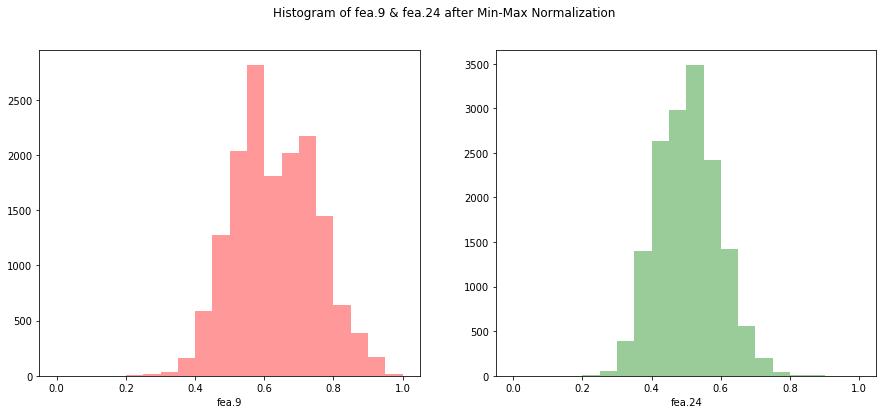

In [44]:
#Histograms after Min-Max normalization:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.distplot(DataA_df_minmax_norm['fea.9'],kde=False,bins=20,ax=ax[0],color='red')
# Set title
plt.suptitle("Histogram of fea.9 & fea.24 after Min-Max Normalization")
sns.distplot(DataA_df_minmax_norm['fea.24'],kde=False,bins=20,ax=ax[1],color='green')
fig.show()

### Z -score Normalization

In [45]:
#Plots after normalizing the data (z-score):
#Importing required library:
from sklearn.preprocessing import StandardScaler
#Instantiating the function
z_score_scaler = StandardScaler()
z_score_scaler.fit(DataA_df_out)
#Transforming the data
z_score_transf = z_score_scaler.transform(DataA_df_out)
#Preparing dataframe
DataA_df_z_score_norm = pd.DataFrame(z_score_transf, index=DataA_df_out.index, columns=DataA_df_out.columns)
DataA_df_z_score_norm.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-0.049537,-0.706145,0.838019,0.772350,0.495932,0.460525,-0.789837,0.254283,0.737665,-1.047080,...,1.648034,-0.810460,-1.263343,-1.721411,-0.351308,-0.557364,-0.436430,0.003181,0.077529,-0.006098
1,-0.038811,-0.689925,0.838019,0.682778,0.500961,0.475914,-0.780360,0.208239,0.684987,-0.966041,...,1.648034,-0.790327,-1.269052,-1.724828,-0.351308,-0.560129,-0.452978,-0.000019,0.109785,-0.103712
2,-0.074565,-0.657484,0.843134,0.766752,0.370212,0.456677,-0.751927,0.192891,0.681889,-1.021032,...,1.648034,-0.770194,-1.280468,-1.728245,-0.401301,-0.573952,-0.490211,-0.011218,0.030612,-0.117656
3,-0.113894,-0.657484,0.766406,0.699573,0.455701,0.522082,-0.717177,0.100804,0.753159,-0.893684,...,1.648034,-0.744309,-1.291885,-1.729954,-0.392211,-0.571187,-0.473663,-0.032016,0.068732,-0.122305
4,-0.113894,0.062337,0.812443,0.615599,0.480845,0.479761,-0.751927,0.208239,0.790344,-0.818434,...,1.648034,-0.718424,-1.309011,-1.733371,-0.401301,-0.551835,-0.432293,-0.014418,-0.025102,-0.099063


/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


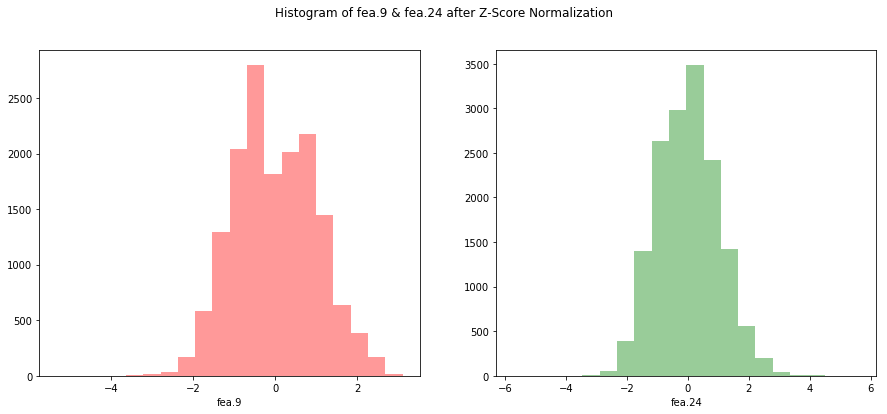

In [46]:
#Histograms after z-score normalization:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.distplot(DataA_df_z_score_norm['fea.9'],kde=False,bins=20,ax=ax[0],color='red')
# Set title
plt.suptitle("Histogram of fea.9 & fea.24 after Z-Score Normalization")
sns.distplot(DataA_df_z_score_norm['fea.24'],kde=False,bins=20,ax=ax[1],color='green')
fig.show()

## Answer I.3
**Just the scale changes before and after applying normalization techniques like Min-Max scalar and Z-score normalization.**

## II. Feature Extraction (for dataset B)

### 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors and eigenvalues.

In [47]:
# Reading Data2.csv:
DataB_df = pd.read_csv('DataB.csv')
DataB_df.head()
Digit_actual = DataB_df['gnd']
DataB_df.drop(['Unnamed: 0','gnd'],axis=1,inplace=True)
DataB_df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


In [48]:
#Feature scaling by subtracting mean from each column:
DataB_df = DataB_df-DataB_df.mean()
DataB_df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


### Eigen Values and Eigen Vectors

In [49]:
# Creating Matrix
X = np.asmatrix(DataB_df)
#Covariance Matrix
cov = np.cov(X.T) #Taking transpose
eig_val, eig_vec = np.linalg.eig(cov)

###  2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

In [50]:
#Selecting top 2 Prinipal components:
U = np.asmatrix(eig_vec[:,:2])
#Projecting original dataset over first two components:
Y = np.dot(U.T,X.T)
#Transposing Y matrix to n by 2:
Y.T.shape

(2066, 2)

In [51]:
df_PCA2 = pd.DataFrame(Y.T, columns=['PC1','PC2'])
df_PCA2['Digit_actual'] = Digit_actual
df_PCA2.head()

,PC1,PC2,Digit_actual
0,1069.166304,513.973184,0
1,1099.176077,570.842223,0
2,673.201385,167.377150,0
3,1010.903339,187.044145,0
4,1692.970822,633.369398,0


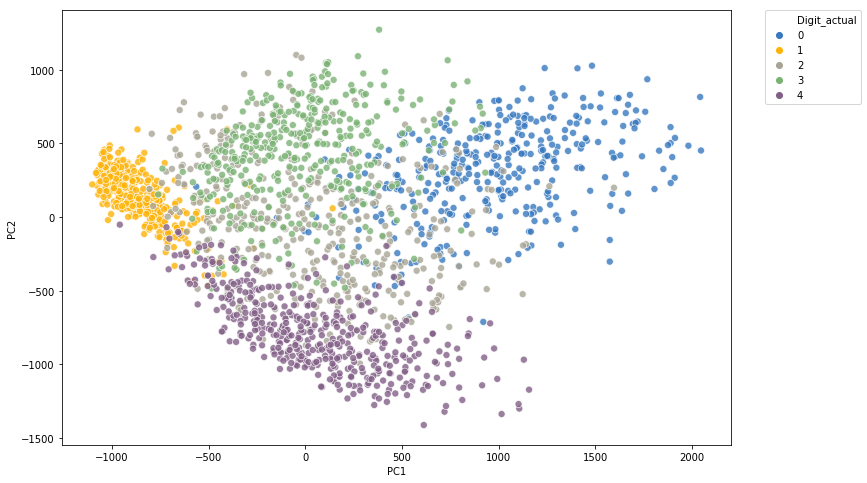

In [52]:
#Plotting:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.scatterplot(x="PC1", y="PC2", alpha = 0.8, s = 50,
                hue="Digit_actual", data=df_PCA2, palette=sns.xkcd_palette(colors),ax=ax)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Answer II.2
**Based on the PCA plot, it is evident that there is somewhat clear distinction of various classes as highlighted by different colors**

### 3. Repeat step 2 for the 5th and 6st components. Comment on the result.

In [53]:
#Selecting top 2 Prinipal components:
U2 = np.asmatrix(eig_vec[:,4:6])
#Projecting original dataset over first two components:
Y2 = np.dot(U2.T,X.T)
#Transposing Y matrix to n by 2:
Y2.T.shape

(2066, 2)

In [54]:
df_PCA5_6 = pd.DataFrame(Y2.T, columns=['PC5','PC6'])
df_PCA5_6['Digit_actual'] = Digit_actual
df_PCA5_6.head()

,PC5,PC6,Digit_actual
0,-387.873484,-335.304982,0
1,-345.573249,-530.737220,0
2,-1036.833666,76.531663,0
3,-901.897549,73.661148,0
4,6.919257,-601.851221,0


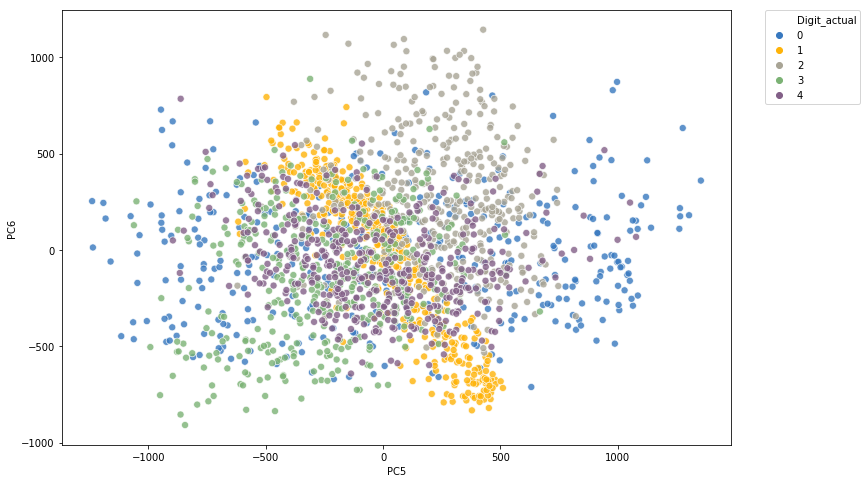

In [55]:
#Plotting:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.scatterplot(x="PC5", y="PC6", alpha = 0.8, s = 50,
                hue="Digit_actual", data=df_PCA5_6, palette=sns.xkcd_palette(colors),ax=ax)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Answer II.3
**Based on the PCA plot, it is quite evident that there is no clear distinction of various classes i.e. the classes overlap with each other as highlighted by different colors. This is because we are taking Principal Component 5 & 6 those doesn’t explain much variation in data as explained by the PC1 and PC2.**

### 4. Use the Naive Bayes classifier to classify 8 sets of dimensionality reduced data (using the first 2, 4, 10, 30, 60, 200, 500, and all 784 PCA components). Plot the classification error for the 8 sets against the retained variance of each case.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

def NaiveBayesClass(n):
    #Selecting n Prinipal components
    U = np.asmatrix(eig_vec[:,:n])
    #Projecting original dataset over n-components:
    Y = np.dot(U.T,X.T)
    Ret_Variance = sum(eig_val[:n])/sum(eig_val)
    
    df_PCA = pd.DataFrame(Y.T)
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(df_PCA, Digit_actual, test_size=0.3,random_state=109) 
    #Create a Gaussian Classifier
    gnb = GaussianNB()
    #Train the model using the training sets
    gnb.fit(X_train, y_train)
    
    #Predict the response for train dataset
    y_train_pred = gnb.predict(X_train)
    
    #Predict the response for train dataset
    y_pred = gnb.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct on train set(for overfitting) ?
    train_error = (1 - metrics.accuracy_score(y_train, y_train_pred))
       
    # Model Accuracy, how often is the classifier correct?
    error = (1 - metrics.accuracy_score(y_test, y_pred))
    
    return Ret_Variance, error, train_error

In [57]:
#Plotting Variance Retained vs Classification Error:
def plotVarVsError(final_metrics):
    df_final = pd.DataFrame(final_metrics,columns=['Retained Variance','Classification Error Test','Classification Error Train'])

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(df_final['Retained Variance'], df_final['Classification Error Test'], '-', label = 'Classification Error Test')
    # sns.lineplot(x='Retained Variance', y='Classification Error Test', data=df_final)
    ax2 = plt.twinx()
    ax2.plot(df_final['Retained Variance'], df_final['Classification Error Train'], '-', label = 'Classification Error Train', color = 'red')
    # sns.lineplot(x='Retained Variance', y='Classification Error Train', data=df_final, color="r", ax=ax2)
    ax.legend(loc=0)
    ax2.legend(loc=1)
    ax.set_xlabel("Variance Retained")
    ax.set_ylabel("Classification Error Test")
    ax2.set_ylabel("Classification Error Train")
    plt.show()

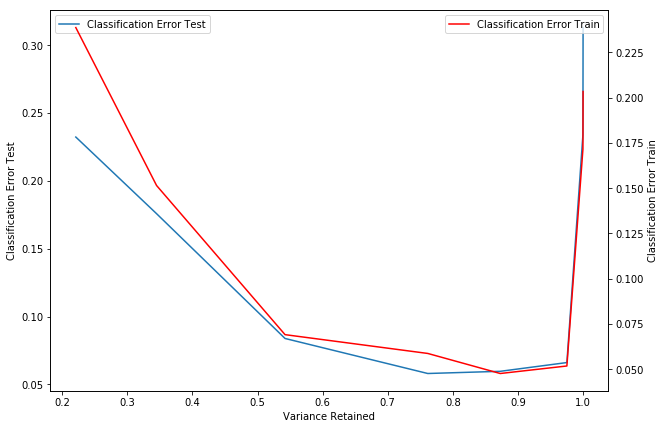

In [58]:
final_metrics = []
n_components = [2, 4, 10, 30, 60, 200, 500, 784]
for n in n_components:
    final_metrics.append(NaiveBayesClass(n))    
plotVarVsError(final_metrics)

### 5. As the class labels are already known, you can use the Linear Discriminant Analysis (LDA) to reduce the dimensionality, plot the data points using the first 2 LDA components (display data points of each class with a different color). Explain the results obtained in terms of the known classes. Compare with the results obtained by using PCA.

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(DataB_df, Digit_actual)
LDA_comp = clf.transform(DataB_df)
LDA_comp.shape

(2066, 2)

In [60]:
LDA_df = pd.DataFrame(LDA_comp,columns=['LDA Comp1','LDA Comp2'])

In [61]:
LDA_df['Digit_actual'] = Digit_actual
LDA_df.head()

,LDA Comp1,LDA Comp2,Digit_actual
0,-5.277233,-2.052912,0
1,-5.913727,-1.953482,0
2,-4.154543,-0.868888,0
3,-6.728769,-2.568941,0
4,-6.977105,-2.125944,0


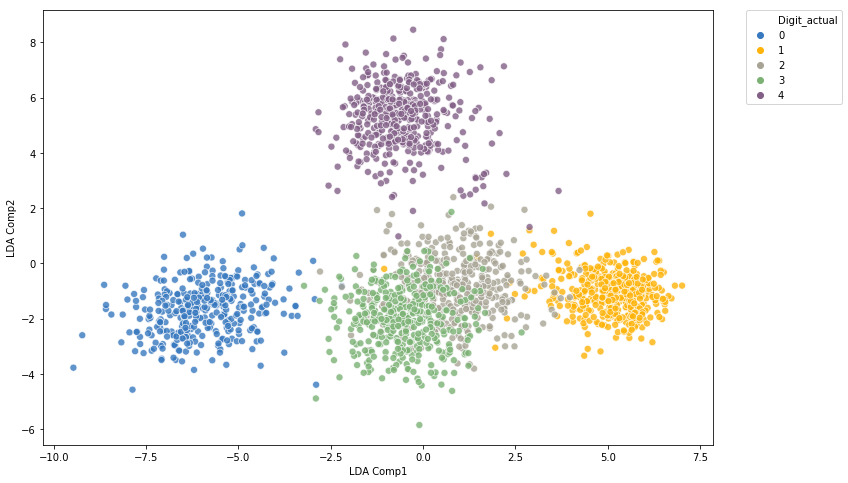

In [62]:
#Plotting:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.scatterplot(x="LDA Comp1", y="LDA Comp2", alpha = 0.8, s = 50,
                hue="Digit_actual", data=LDA_df, palette=sns.xkcd_palette(colors),ax=ax)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Answer II.5
**Based on the LDA plot, we can see different classes clearly without significant overlap between classes.**<br>
**On comparing LDA Components 1 & 2 with PCA 1 & 2, we can clearly observe that the LDA is seperating classes much better that PCA. This is beacause, PCA doesn't consider classes while reducing the dimentions but LDA is supervised technique that considers classes and tries to minimize distance between data points of same class and maximize the difference between each classes**<br>

## III. Nonlinear Dimensionality Reduction (for dataset B)
### Apply the nonlinear dimensionality reduction methods Locally Linear Embedding (LLE) and ISOMAP to the dataset B, set the number of nearest neighbours to be 5, the projected low dimension to be 4.

In [63]:
#Duplicating the dataframe:
DataB_PartIII = DataB_df
DataB_PartIII.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.491772,1.452565,0.539206,-2.496612,-2.472894,1.509681,-0.486447,-1.512585,1.477735,-1.482091,...,-1.517909,-1.469506,0.477251,-2.486447,1.550339,-0.498064,-1.525653,-1.54211,1.59971,2.480639
1,2.491772,-1.547435,1.539206,0.503388,-1.472894,0.509681,2.513553,-1.512585,1.477735,1.517909,...,0.482091,-1.469506,-1.522749,0.513553,0.550339,-1.498064,0.474347,0.45789,2.59971,1.480639
2,-1.508228,0.452565,-2.460794,0.503388,-1.472894,-1.490319,-2.486447,-1.512585,-2.522265,-0.482091,...,1.482091,0.530494,-2.522749,-0.486447,1.550339,-0.498064,-0.525653,-1.54211,-0.40029,1.480639
3,2.491772,0.452565,-0.460794,0.503388,2.527106,-0.490319,-0.486447,-2.512585,1.477735,2.517909,...,1.482091,2.530494,1.477251,2.513553,-1.449661,1.501936,1.474347,-0.54211,1.59971,1.480639
4,0.491772,2.452565,0.539206,0.503388,-2.472894,1.509681,-1.486447,-1.512585,1.477735,0.517909,...,-1.517909,-1.469506,0.477251,0.513553,0.550339,-1.498064,-0.525653,1.45789,-1.40029,-1.519361


In [64]:
#For LLE 1st 4 components:
from sklearn.manifold import LocallyLinearEmbedding
embedding_LLE_4 = LocallyLinearEmbedding(n_components=4,n_neighbors=5)
X_transformed_LLE_4 = embedding_LLE_4.fit_transform(DataB_PartIII)
X_transformed_LLE_4.shape

(2066, 4)

In [65]:
#Creating Dataframe:
LLE_df = pd.DataFrame(X_transformed_LLE_4,columns=['LLE Comp1','LLE Comp2','LLE Comp3','LLE Comp4'])
LLE_df['Digit_actual'] = Digit_actual
LLE_df.head()

,LLE Comp1,LLE Comp2,LLE Comp3,LLE Comp4,Digit_actual
0,0.045258,0.000862,-0.000512,-0.000526,0
1,0.045061,0.000828,-0.000496,-0.000479,0
2,0.044573,0.000925,-0.000080,-0.001249,0
3,0.044700,0.000871,-0.000293,-0.000929,0
4,0.046829,0.001124,-0.000663,-0.000851,0


In [66]:
#For Isomap 1st 4 components:
from sklearn.manifold import Isomap
embedding_Iso_4 = Isomap(n_components=4,n_neighbors=5)
X_transformed_Iso_4 = embedding_Iso_4.fit_transform(DataB_PartIII)
X_transformed_Iso_4.shape

(2066, 4)

In [67]:
#Creating Dataframe:
Isomap_df = pd.DataFrame(X_transformed_Iso_4,columns=['Isomap Comp1','Isomap Comp2','Isomap Comp3','Isomap Comp4'])
Isomap_df['Digit_actual'] = Digit_actual
Isomap_df.head()

,Isomap Comp1,Isomap Comp2,Isomap Comp3,Isomap Comp4,Digit_actual
0,8706.049952,-344.127405,-344.048497,-1657.818864,0
1,8858.821154,-333.866129,280.234058,-1752.912922,0
2,3954.252089,-926.795027,1093.258392,-43.631241,0
3,5791.867059,-643.647584,552.428333,-256.098798,0
4,10700.083472,281.608819,768.689592,-108.528612,0


### 1. Apply LLE to the images of digit '3' only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE, see Figure for an example of what this looks like for random location of images on of the number 1-3. Describe qualitatively what kind of variations is captured.

In [68]:
DataB_df_Full = DataB_df
DataB_df_Full['Digit_actual'] = Digit_actual
# Filtering the dataframe to select images of digit '3' only:
DataB_df_3 = DataB_df_Full[DataB_df_Full['Digit_actual']==3]
DataB_df_3_labels = DataB_df_3['Digit_actual']
DataB_df_3.drop(columns = ['Digit_actual'], inplace = True)

DataB_df_3_LLE = DataB_df_3
DataB_df_3_LLE.head()

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
1237,0.491772,1.452565,-0.460794,-1.496612,0.527106,0.509681,-2.486447,-1.512585,-0.522265,-2.482091,...,1.482091,2.530494,2.477251,-2.486447,-2.449661,0.501936,0.474347,0.45789,-0.40029,0.480639
1238,1.491772,0.452565,2.539206,-0.496612,-2.472894,1.509681,0.513553,2.487415,2.477735,-0.482091,...,-1.517909,1.530494,-0.522749,-2.486447,-0.449661,0.501936,0.474347,2.45789,-0.40029,2.480639
1239,-2.508228,1.452565,-0.460794,1.503388,-0.472894,-1.490319,1.513553,-0.512585,0.477735,2.517909,...,-1.517909,-1.469506,2.477251,2.513553,-2.449661,-1.498064,1.474347,0.45789,-1.40029,2.480639
1240,-0.508228,0.452565,-1.460794,-0.496612,-0.472894,0.509681,-1.486447,-0.512585,0.477735,0.517909,...,1.482091,2.530494,0.477251,0.513553,-2.449661,1.501936,-1.525653,0.45789,0.59971,1.480639
1241,-2.508228,1.452565,-0.460794,-2.496612,2.527106,-1.490319,0.513553,1.487415,0.477735,1.517909,...,0.482091,-0.469506,-1.522749,1.513553,-2.449661,-1.498064,-1.525653,-0.54211,0.59971,-1.519361


In [69]:
#For LLE (2 components):
from sklearn.manifold import LocallyLinearEmbedding
embedding_LLE_2 = LocallyLinearEmbedding(n_components=2)
X_transformed_LLE_2 = embedding_LLE_2.fit_transform(DataB_df_3_LLE)
X_transformed_LLE_2.shape

(398, 2)

In [70]:
#Creating Dataframe:
LLE_2_df = pd.DataFrame(X_transformed_LLE_2,columns=['LLE Comp1','LLE Comp2'])
LLE_2_df.head()

,LLE Comp1,LLE Comp2
0,0.106664,-0.000580
1,-0.039784,-0.064899
2,-0.032191,0.105290
3,0.039904,0.024589
4,-0.024724,0.038266


In [71]:
# Function to plot digits on a scatter plot:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, z, ax=None, zoom=0.9):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, z0 in zip(x, y, z):
        #Converting 
        z0 = z0.reshape(28, 28)
        im = OffsetImage(z0, norm=plt.Normalize(0,255), cmap="gray_r", zoom=zoom, alpha= 0.9)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def plotDigits(x,y,z, xlabel, ylabel, zoom = 1):
    fig, ax = plt.subplots(figsize=(12, 9))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_facecolor((1.0, 1.0, 1.0))
    imscatter(x, y, z, zoom= zoom, ax=ax)
    plt.show()

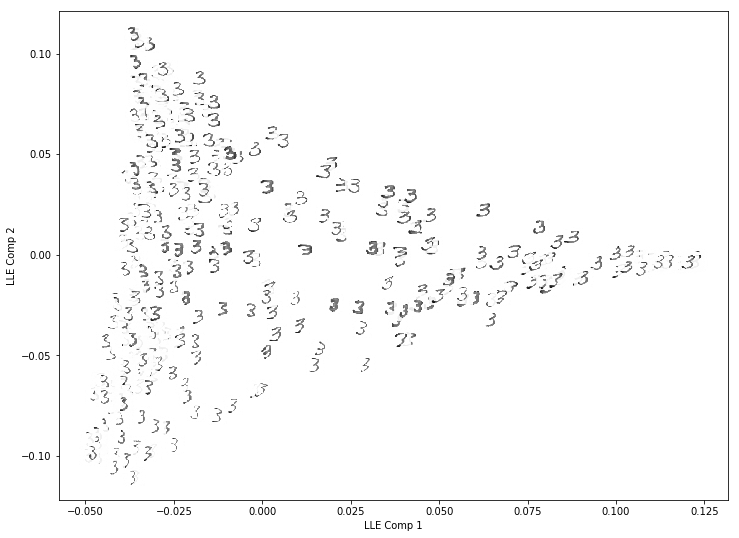

In [72]:
#Plotting word embeddings for LLE:
x = LLE_2_df['LLE Comp1']
y = LLE_2_df['LLE Comp2']
z =  np.array(DataB_df_3)

plotDigits(x, y, z, 'LLE Comp 1', 'LLE Comp 2', zoom = 0.7)

## Answer III.1
**By looking at the graph it is difficult to say which tangible features are captured from component 1 and 2. But we can some what observe the angle or rotation of the hand written digits changing as we move on the axis of the plot. We can also observe the curvyness of the digits captured collectively from Component 1 and 2. But is very unclear to pin point these features interms of Component 1 or component 2**

### 2. Repeat step 1 using the ISOMAP method. Comment on the result. Does ISOMAP do better in some way? Are the patterns being found globally based or locally based?

In [73]:
#For Isomap (2 components):
DataB_df_3_Isomap = DataB_df_3
from sklearn.manifold import Isomap
embedding_Iso = Isomap(n_components=2)
X_transformed_Iso = embedding_Iso.fit_transform(DataB_df_3_Isomap)
X_transformed_Iso.shape

(398, 2)

In [74]:
#Creating Dataframe:
Iso_2_df = pd.DataFrame(X_transformed_Iso,columns=['Iso Comp1','Iso Comp2'])
Iso_2_df.head()

,Iso Comp1,Iso Comp2
0,4374.088140,1846.119626
1,-139.012696,-627.652030
2,-2386.818004,505.515582
3,2707.756346,1103.644366
4,-2914.155127,742.414660


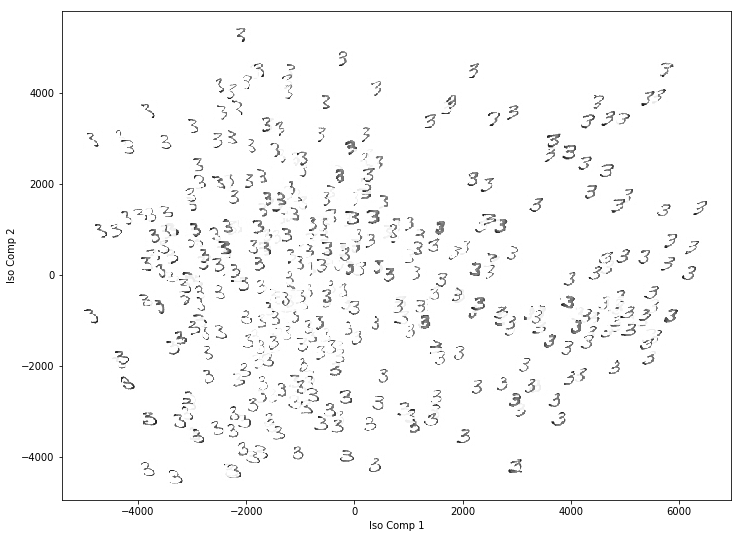

In [75]:
#Plotting word embeddings for ISOMAP:
x = Iso_2_df['Iso Comp1']
y = Iso_2_df['Iso Comp2']
z =  np.array(DataB_df_3)

plotDigits(x, y, z, 'Iso Comp 1', 'Iso Comp 2', zoom = 0.7)

## Answer III.2
**From the above graph of Isomap component 1 vs Isomap component 2, we can clearly observe the pattern capured. The component 1 (x axis) capturing angle or rotation of the digit clearly. The digits in left hand side of the graphs are tilted to left and the gradually rotating toawards right as we move right to the graph. We can say that the component 1 is capturing angle or rotation feature**

**Similarly we can observe curvyness of the digit for example the amount of curve at the bottom of the digit. As we move from bottom to top this curvyness increases. At the bottom digits have small tails and at the top digits have heavy curvy tail.**

**So apparantly, we can say that component 1 is capturing angle and component 2 is capturing curvyness at the bottom**

### 3. Use the Naive Bayes classifier to classify the dataset based on the projected 4-dimension representations of the LLE and ISOMAP. Train your classifier by randomly selected 70% of data, and test with remained 30%. Retrain for multiple iterations (using different random partitions of the data) and use the average accuracy of multiple runs for your analysis. Justify why your number of iterations was sufficient. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result.

## For LLE:

In [76]:
#Preparing the dataframe:
LLE_Digit_actual=LLE_df['Digit_actual']
LLE_df_NB= LLE_df.drop('Digit_actual',axis=1)
LLE_df_NB.head()

,LLE Comp1,LLE Comp2,LLE Comp3,LLE Comp4
0,0.045258,0.000862,-0.000512,-0.000526
1,0.045061,0.000828,-0.000496,-0.000479
2,0.044573,0.000925,-0.000080,-0.001249
3,0.044700,0.000871,-0.000293,-0.000929
4,0.046829,0.001124,-0.000663,-0.000851


In [77]:
# Split dataset into training set and test set (70:30 ratio):
X_train, X_test, y_train, y_test = train_test_split(LLE_df_NB, LLE_Digit_actual, test_size=0.3,random_state=109) 
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
    
#Predict the response for train dataset
y_pred = gnb.predict(X_test)
       
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(y_test, y_pred)

In [78]:
#Accuracy after 70:30 Train-Test split:
Accuracy

0.9129032258064517

In [103]:
#Function for calculating average accuracy based on KFolds:
from numpy import array
from sklearn.model_selection import KFold

def kFold_NB(df):
    # data
    data = df.as_matrix() 
    # enumerate splits 
    New_Avg_Accuracy = []
    # prepare cross validation
    for k in range(5,18):
       
        kfold = KFold(k, True, 1)
       
        for train, test in kfold.split(data):
            # enumerate splits 
            Avg_Accuracy = []
            Train_Data = data[train]
            X_train = Train_Data[:,:4]
            y_train = Train_Data[:,4:5]
            Test_Data = data[test]
            X_test = Test_Data[:,:4]
            y_test = Test_Data[:,4:5]
            #Create a Gaussian Classifier
            gnb = GaussianNB()
            #Train the model using the training sets
            gnb.fit(X_train, y_train.ravel())
            
            #Predict the response for train dataset
            y_pred = gnb.predict(X_test)
            
            # Model Accuracy, how often is the classifier correct?
            Accuracy = metrics.accuracy_score(y_test, y_pred)
                        
            Avg_Accuracy.append(Accuracy)            
        Accuracy_Score = sum(Avg_Accuracy)/ len(Avg_Accuracy)
        New_Avg_Accuracy.append(Accuracy_Score)
    
    return New_Avg_Accuracy      

In [104]:
#Average accuracy of dataset startting from kfold value 10 to 17 folds:
LLE_kfold_Accuracy = list(kFold_NB(LLE_df))
LLE_kfold_Accuracy

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[0.9152542372881356,
 0.9127906976744186,
 0.911864406779661,
 0.9147286821705426,
 0.9213973799126638,
 0.9174757281553398,
 0.9251336898395722,
 0.9244186046511628,
 0.9177215189873418,
 0.9183673469387755,
 0.9197080291970803,
 0.9147286821705426,
 0.9173553719008265]

### Q. Justify why your number of iterations was sufficient.
### Ans. Justification for choosing Kfold = 11 is that it's giving the best results i.e. Average Accuracy of 0.9251336898395722.

## Isomap:

In [105]:
Isomap_Digit_actual=Isomap_df['Digit_actual']
Isomap_df_NB= Isomap_df.drop('Digit_actual',axis=1)
Isomap_df_NB.head()

,Isomap Comp1,Isomap Comp2,Isomap Comp3,Isomap Comp4
0,8706.049952,-344.127405,-344.048497,-1657.818864
1,8858.821154,-333.866129,280.234058,-1752.912922
2,3954.252089,-926.795027,1093.258392,-43.631241
3,5791.867059,-643.647584,552.428333,-256.098798
4,10700.083472,281.608819,768.689592,-108.528612


In [106]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Isomap_df_NB, Isomap_Digit_actual, test_size=0.3,random_state=109) 
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
    
#Predict the response for train dataset
y_pred = gnb.predict(X_test)
       
# Model Accuracy, how often is the classifier correct?
Accuracy_Isomap = metrics.accuracy_score(y_test, y_pred)

In [107]:
#Accuracy after 70:30 Train-Test split:
Accuracy_Isomap

0.8548387096774194

In [108]:
#Average accuracy of dataset startting from kfold value 10 to 17 folds:
#Kfold method to split the data: Calling function kFold_NB()
Isomap_kfold_Accuracy = list(kFold_NB(Isomap_df))
Isomap_kfold_Accuracy

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[0.87409200968523,
 0.8808139534883721,
 0.8813559322033898,
 0.8875968992248062,
 0.9082969432314411,
 0.9077669902912622,
 0.9144385026737968,
 0.9069767441860465,
 0.8987341772151899,
 0.8979591836734694,
 0.8978102189781022,
 0.8914728682170543,
 0.8925619834710744]

### Q. Justify why your number of iterations was sufficient.
### Ans. Justification for choosing Kfold = 11 is that it's giving the best results i.e. Average Accuracy of 0.9144385026737968.

## PCA:

In [109]:
#Selecting top 4 Prinipal components:
U3 = np.asmatrix(eig_vec[:,:4])
#Projecting original dataset over first four components:
Y3 = np.dot(U3.T,X.T)
#Transposing Y matrix to n by 4:
Y3.T.shape

df_PCA1_4 = pd.DataFrame(Y3.T, columns=['PC1','PC2','PC3','PC4'])
df_PCA1_4['Digit_actual'] = Digit_actual
df_PCA1_4.head()

,PC1,PC2,PC3,PC4,Digit_actual
0,1069.166304,513.973184,139.243261,878.387704,0
1,1099.176077,570.842223,67.311779,839.381070,0
2,673.201385,167.377150,-480.988638,83.823068,0
3,1010.903339,187.044145,-506.352247,426.446929,0
4,1692.970822,633.369398,521.943052,367.356716,0


In [110]:
#Kfold method to split the data: Calling function kFold_NB()
PCA_kfold_Accuracy = list(kFold_NB(df_PCA1_4))
PCA_kfold_Accuracy

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[0.8426150121065376,
 0.8430232558139535,
 0.8406779661016949,
 0.8488372093023255,
 0.8820960698689956,
 0.8786407766990292,
 0.8823529411764706,
 0.8837209302325582,
 0.8734177215189873,
 0.8707482993197279,
 0.8613138686131386,
 0.8604651162790697,
 0.859504132231405]

## LDA:

In [111]:
#Selecting top 4 Components (LDA):
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1 = LinearDiscriminantAnalysis(n_components=4)
# DataB_df.drop(['Digit_actual'], axis = 1, inplace = True)
clf1.fit(DataB_df, Digit_actual)
LDA_comp1_4 = clf1.transform(DataB_df)
LDA_comp1_4.shape

LDA_df1_4 = pd.DataFrame(LDA_comp1_4,columns=['LDA Comp1','LDA Comp2','LDA Comp3','LDA Comp4'])
LDA_df1_4['Digit_actual'] = Digit_actual
LDA_df1_4.head()

,LDA Comp1,LDA Comp2,LDA Comp3,LDA Comp4,Digit_actual
0,-5.277233,-2.052912,3.473823,-1.613518,0
1,-5.913727,-1.953482,3.665304,0.189606,0
2,-4.154543,-0.868888,1.172538,0.746605,0
3,-6.728769,-2.568941,4.442847,-0.640440,0
4,-6.977105,-2.125944,2.281978,-0.505802,0


In [112]:
#Kfold method to split the data: Calling function kFold_NB()
LDA_kfold_Accuracy = list(kFold_NB(LDA_df1_4))
LDA_kfold_Accuracy

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[0.9951573849878934,
 0.9941860465116279,
 0.9932203389830508,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

### Q. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result.¶
### Ans. On comparing the performance of based on Average Accuracy, Isomap outperforms PCA but not LDA.

### On comparing the performance of based on Average Accuracy, LLE also outperforms PCA but not LDA.

### To summarize our results, LDA outperforms all the other three dimensionality reduction techniques as shown below:
### LDA > LLE > Isomap > PCA (Descreasing order)